# Word2Vec Model Trainer

In [1]:
import gensim
import codecs
import json
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

class Corpus_Iterator(object):
    def __init__(self,filename):
        self.filename = filename
        
    def __iter__(self):
        ind=0
        for line in codecs.open(self.filename,'r',encoding='utf8'):
            try:
                record = json.loads(line)
            except:
                print(line +' '*10+str(ind))
            title = record['title']
            abstract_sents = record['abstract']
            ind+=1
            if ind%1000==0:
                percent = int(100*float(ind)/449000)
                sys.stdout.write('\r[{0}] {1}% {2}'.format('#'*(percent/10), percent, ind))
                sys.stdout.flush()
            yield title.split()
            for sent in abstract_sents:
                yield sent.split()

corpus_file = 'exp2.json'



/Users/lewisp123/miniconda2/envs/Fruitbowl/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
corpus_file = 'exp2.json'
corp = Corpus_Iterator(corpus_file)
model = gensim.models.Word2Vec(corp,min_count=1,size=100)
model.save('RaspberryEngine')


[##########] 100% 449000
          449022
[##########] 100% 449000
          449022


In [23]:
vec_title=[]
for word in random_rec['title'].split():
    vec_title.append(model[word])

In [5]:
sample =[]
randoms = [random.randint(0,449000) for i in range(2000)]
randoms = sorted(randoms)
ind=0
for line in codecs.open(corpus_file,'r',encoding='utf8'):
    if ind in randoms:
        record = json.loads(line)
        sample.append(record)
    ind+=1
    if ind%1000==0:
        percent = int(100*float(ind)/449000)
        sys.stdout.write('\r[{0}] {1}% {2}'.format('#'*(percent/10), percent, ind))
        sys.stdout.flush()
    

[##########] 100% 449000

In [2]:
model = gensim.models.Word2Vec.load('RaspberryEngine')

In [10]:
store = numpy.zeros((40708,100))
ind = 0
for s in sample:
    for w in s['title'].split():
        store[ind,:]=model[w].reshape((1,100))
        ind+=1
    for se in s['abstract']:
        for w in se.split():
            store[ind,:]=model[w]
            ind+=1
    print(ind)
        

133
252
303
308
407
460
569
666
687
745
759
826
845
866
986
1014
1057
1080
1107
1122
1139
1206
1328
1402
1438
1493
1567
1611
1725
1809
1830
2003
2027
2062
2119
2215
2262
2316
2352
2387
2541
2581
2642
2704
2769
2852
2960
3051
3186
3242
3309
3352
3374
3471
3520
3621
3690
3897
3979
3986
4044
4051
4132
4177
4248
4329
4364
4404
4460
4598
4672
4734
4740
4751
4847
5020
5032
5083
5182
5282
5327
5406
5438
5567
5607
5650
5778
5826
5908
5943
6026
6089
6161
6317
6352
6380
6432
6467
6551
6694
6843
6866
7019
7135
7171
7229
7303
7380
7454
7516
7532
7563
7688
7728
7785
7888
7944
8003
8041
8082
8182
8286
8326
8449
8472
8549
8605
8667
8744
8775
8875
8984
9115
9237
9285
9384
9515
9634
9717
9770
9857
9924
10041
10170
10312
10408
10477
10518
10654
10718
10746
10851
10956
10976
11129
11199
11254
11345
11381
11393
11489
11648
11708
11754
11791
11872
11970
12041
12175
12236
12342
12448
12529
12601
12695
12808
12927
13031
13065
13119
13261
13295
13377
13441
13534
13616
13641
13796
13848
13964
14025
14093
14166

IndexError: index 40708 is out of bounds for axis 0 with size 40708

In [97]:
size,_ = store.shape
ind=0
newsize = np.arange(0,size,50).shape[0]
newstore = np.zeros([newsize,100 ])
for i in np.arange(0,size,50):
    newstore[ind,:]=store[i,:]
    ind+=1

In [4]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
#t = TSNE(perplexity= 50.0, early_exaggeration=4.0,init='pca')
#X_t = t.fit_transform(newstore)

In [77]:
newstore[:,1].shape

(136,)

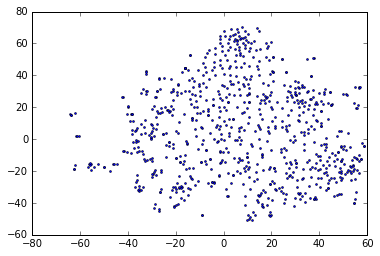

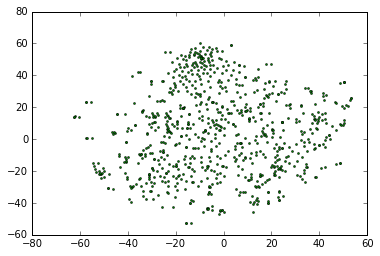

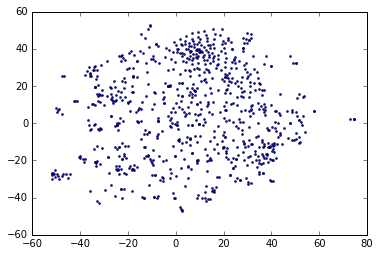

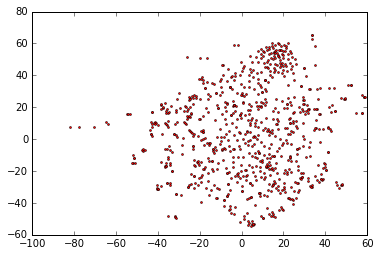

In [113]:
%matplotlib inline
t = TSNE(perplexity= 10.0, early_exaggeration=40.0,init='pca')
X_t = t.fit_transform(newstore)
plt.plot(X_t[:,0],X_t[:,1],'bo',markersize=2)
plt.show()
t = TSNE(perplexity= 10.0, early_exaggeration=30.0,init='pca')
X_t = t.fit_transform(newstore)
plt.plot(X_t[:,0],X_t[:,1],'go',markersize=2)
plt.show()
t = TSNE(perplexity= 10.0, early_exaggeration=20.0,init='pca')
X_t = t.fit_transform(newstore)
plt.plot(X_t[:,0],X_t[:,1],'bo',markersize=2)
plt.show()
t = TSNE(perplexity= 10.0, early_exaggeration=10.0,init='pca')
X_t = t.fit_transform(newstore)
plt.plot(X_t[:,0],X_t[:,1],'ro',markersize=2)#plt.show()
plt.show()

In [7]:
ave_store = np.zeros((len(sample),100))
ind = 0
for s in sample:
    mod = 0
    acc=np.zeros(100)
    for w in s['title'].split():
        mod+=1
        acc+=model[w]
    for se in s['abstract']:
        for w in se.split():
            acc+=model[w]
            mod+=1
    print(ind)
    ave_store[ind,:]=acc/mod
    ind+=1
'''size,_ = ave_store.shape
ind=0
newsize = np.arange(0,size,50).shape[0]
newstore = np.zeros([newsize,100 ])
for i in np.arange(0,size,50):
    newstore[ind,:]=store[i,:]
    ind+=1
'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

'size,_ = ave_store.shape\nind=0\nnewsize = np.arange(0,size,50).shape[0]\nnewstore = np.zeros([newsize,100 ])\nfor i in np.arange(0,size,50):\n    newstore[ind,:]=store[i,:]\n    ind+=1\n'

In [23]:
%matplotlib
t = TSNE(init='pca',perplexity= 10.0, early_exaggeration=10.0)
X_t = t.fit_transform(ave_store)
plt.plot(X_t[:,0],X_t[:,1],'bo',markersize=1)
kmeans = KMeans(n_clusters=30,init='k-means++',max_iter=50000,verbose=0,tol=0.00000000001)
b=kmeans.fit(X_t)
plt.plot(b.cluster_centers_[:,0],b.cluster_centers_[:,1],'ro',markersize=5)
plt.show()

Using matplotlib backend: MacOSX


In [130]:
from sklearn.cluster import KMeans
from sklearn import datasets

kmeans = KMeans(n_clusters=8)
b=kmeans.fit(X_t)

In [129]:
X_t

array([[  0.77600958,  10.46800077],
       [  2.9529872 ,   9.78495435],
       [ 14.25874394,   5.25000136],
       ..., 
       [ -4.90388009,   2.70987845],
       [  1.5866846 , -10.7607668 ],
       [ -0.89412612, -10.20674362]])

In [132]:
b.cluster_centers_

array([[  2.64044024, -13.06643393],
       [-13.85472157,  -2.4263241 ],
       [-11.75503021,   8.65712309],
       [ 13.96603293,   6.79222751],
       [ -9.69080765, -12.5123048 ],
       [ -1.32666759,  16.03101477],
       [ 13.23227927,  -9.9941531 ],
       [  0.77555805,   0.23240002]])

In [92]:
distances = np.zeros([1998,30])
ind=0
for centroid in b.cluster_centers_:
    distances[:,ind]=np.sum((X_t-centroid)**2,axis=1)**.5
    ind+=1
cluster=np.argmin(distances,axis=1)
for i in range(30):
    clus = X_t[np.where(cluster==i)[0]]
    plt.plot(clus[:,0],clus[:,1],'o',markersize=5)

In [87]:
X_t[np.where(cluster==i)[0],marker =]

SyntaxError: invalid syntax (<ipython-input-87-e9da5b097f8d>, line 1)

In [79]:
for i in range(30):
     print np.where(cluster==i)[0].shape

(86,)
(72,)
(59,)
(59,)
(88,)
(88,)
(42,)
(73,)
(58,)
(74,)
(91,)
(66,)
(43,)
(70,)
(56,)
(86,)
(58,)
(67,)
(64,)
(51,)
(89,)
(59,)
(71,)
(79,)
(51,)
(53,)
(59,)
(78,)
(63,)
(45,)


In [58]:
cluster

array([ 6, 20,  6, ..., 16, 20, 12])

In [20]:
def VisualiseCluster(model, sample_size, tsne_params,cluster_no):
    corpus_size=0
    print('Calculating Corpus size')
    for line in codecs.open(corpus_file,'r',encoding='utf8'):
        corpus_size+=1
    print('corpus size: '+str(corpus_size))
    randoms = [random.randint(0,corpus_size) for i in range(sample_size)]
    sample=[]
    ind=0
    print('sampling '+str(sample_size)+' random records')
    for line in codecs.open(corpus_file,'r',encoding='utf8'):
        if ind in randoms:
            record = json.loads(line)
            sample.append(record)
        ind+=1
        if ind%1000==0:
            percent = int(100*float(ind)/corpus_size)
            sys.stdout.write('\r[{0}] {1}% {2}'.format('#'*(percent/10), percent, ind))
            sys.stdout.flush()
    sample_size=len(sample) #readjust sample size in case of duplicates
    dimensionality=100
    print('\nGenerating article vectors')
    article_vecs = np.zeros((sample_size,dimensionality))
    ind = 0
    for s in sample:
        mod = 0
        acc=np.zeros(dimensionality)
        for w in s['title'].split():
            mod+=1
            acc+=model[w]
        for se in s['abstract']:
            for w in se.split():
                acc+=model[w]
                mod+=1
        article_vecs[ind,:]=acc/mod
        ind+=1
        if ind%100==0:
            percent = int(100*float(ind)/sample_size)
            sys.stdout.write('\r[{0}] {1}% {2}'.format('#'*(percent/10), percent, ind))
            sys.stdout.flush()
    print('\nPerforming Dimensional Reduction')
    sys.stdout.flush()
    t = TSNE(init='pca',perplexity= 10.0, early_exaggeration=10.0)
    reduced_article_vecs = t.fit_transform(article_vecs)
    print('Generating cluster centres')
    kmeans = KMeans(n_clusters=cluster_no,init='k-means++',max_iter=50000,verbose=0,tol=0.00000000001)
    cluster_centres =kmeans.fit(reduced_article_vecs).cluster_centers_
    print('Calculating cluster distances')
    distances = np.zeros([sample_size,cluster_no])
    ind=0
    for centroid in cluster_centres:
        distances[:,ind]=np.sum((reduced_article_vecs-centroid)**2,axis=1)**.5
        ind+=1
    cluster=np.argmin(distances,axis=1)
    print('plotting results')
    colors=iter(plt.cm.rainbow(np.linspace(0,1,cluster_no)))
    for i in range(cluster_no):
        clus = reduced_article_vecs[np.where(cluster==i)[0]]
        color = next(colors)
        plt.plot(clus[:,0],clus[:,1],'.',c=color, markersize=3)
        plt.plot(cluster_centres[i,0],cluster_centres[i,1],'o',c=color)
    plt.show()
    
        

In [26]:
VisualiseCluster(model,300,_,5)

Calculating Corpus size
corpus size: 449023
sampling 300 random records
[#########] 99% 449000
Generating article vectors
[######] 66% 200
Performing Dimensional Reduction
Generating cluster centres
Calculating cluster distances
plotting results


In [25]:
colors=iter(plt.cm.rainbow(np.linspace(0,1,30)))
for c in colors:
    print c

[ 0.5  0.   1.   1. ]
[ 0.4372549   0.09840028  0.99878599  1.        ]
[ 0.36666667  0.20791169  0.9945219   1.        ]
[ 0.29607843  0.31486959  0.98720184  1.        ]
[ 0.2254902   0.41796034  0.97684832  1.        ]
[ 0.15490196  0.51591783  0.96349314  1.        ]
[ 0.09215686  0.59770746  0.94913494  1.        ]
[ 0.02156863  0.68274886  0.93022931  1.        ]
[ 0.04901961  0.75940492  0.90846527  1.        ]
[ 0.11960784  0.82673417  0.88390971  1.        ]
[ 0.19019608  0.88390971  0.85663808  1.        ]
[ 0.26078431  0.93022931  0.82673417  1.        ]
[ 0.32352941  0.96182564  0.79801723  1.        ]
[ 0.39411765  0.98620075  0.76339828  1.        ]
[ 0.46470588  0.9984636   0.72643357  1.        ]
[ 0.53529412  0.9984636   0.68723669  1.        ]
[ 0.60588235  0.98620075  0.64592806  1.        ]
[ 0.67647059  0.96182564  0.60263464  1.        ]
[ 0.73921569  0.93022931  0.56259275  1.        ]
[ 0.80980392  0.88390971  0.51591783  1.        ]
[ 0.88039216  0.82673417  0.

In [21]:
import matplotlib.colors as mc

In [31]:
cols = mc.cnames.keys()

In [32]:
len(cols)/30

5

In [36]:
colors = cols[::5]

In [38]:
len(colors)

30

In [3]:
colors=[(255/2, 255/2, 255/2),
(51, 23, 0),
(41, 95, 153),
(255, 127, 0),
(255, 255, 0),
(127, 0, 127),
(0, 168, 5),
(255, 0, 0),
(183, 201, 221),
(119, 58, 0),
(112, 148, 187),
(187, 92, 0),
(27, 119, 11),
(255, ffjddfdffdsafdsa
(255, 255, 170),
(76, 15, 42),
(255, 255, 85),
(102, 7, 85),
(13, 143, 85),
(255, 42, 0),
(170, 226, 17),
(170, 0, 85),
(85, 197, 34),
(212, 0, 42),
(17, 120, 34),
(255, 85, 85),
(34, 72, 17),
(255, 170, 170),
(70, 63, 144),
(255, 170, 0)]
colors=map( lambda x: (x[0]/255.,x[1]/255.,x[2]/255.),colors)

In [11]:
plt.plot([1,2,3],[4,5,6],color=colors[7])

In [12]:
plt.show()